# Clustering

Clustering is the unsupervised learning task of grouping object  based on given real and/or categorical input ("feature") data, _X_. The objective of clustering is to learn groupings such that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters).

A variety of clustering algorithms exist. These algorithms can assign clusters to points based on different properties, including distance connectivity, centroid distance, distributional similarity, relative density, and graph connectivity.

Here, we'll use the scikit-learn (sklearn) package to expore the use of several clustering algorithms. Let's fetch the Iris dataset from the UCI Machine Learning repository.

## *k*-Means Clustering

Let's begin by loading some basic packages and the Iris dataset, a well-known multivariate dataset with four features describing three classes of flowers.

In [1]:
import numpy as np
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)

X = data.iloc[:, :-1]  # features
y = data.iloc[:, -1]  # class

print(X.head())
print()
print(y.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

Let's use _k_-means clustering to cluster the Iris Flower database. To determine the clusters, the algorithm will only use the feature data, `X`. We can use the class values, `y`, as ground truth to assess the "goodness" of the generated clusters. We'll use several values of _k_ and observe the different clusters they produce.

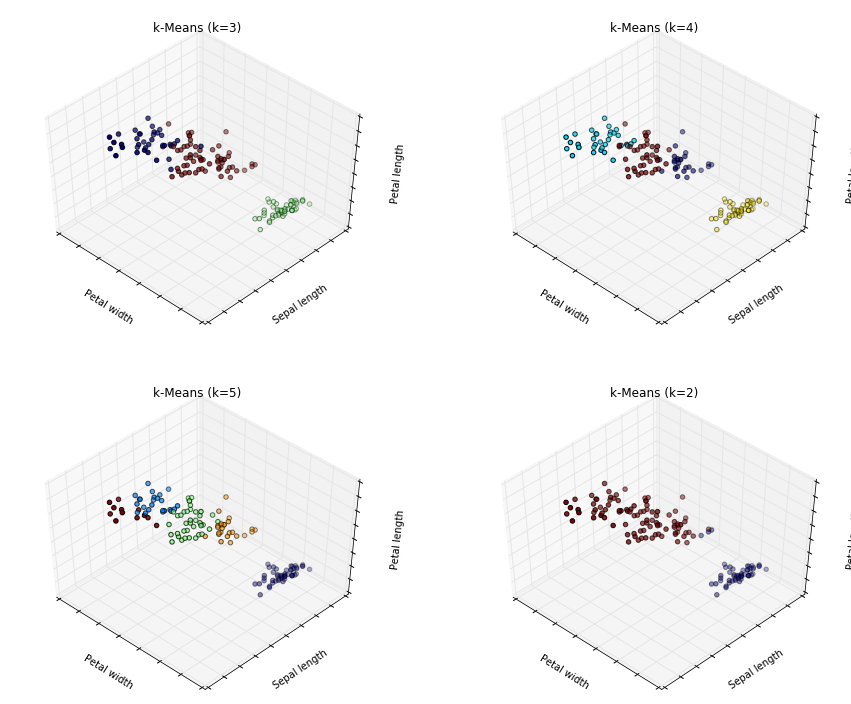

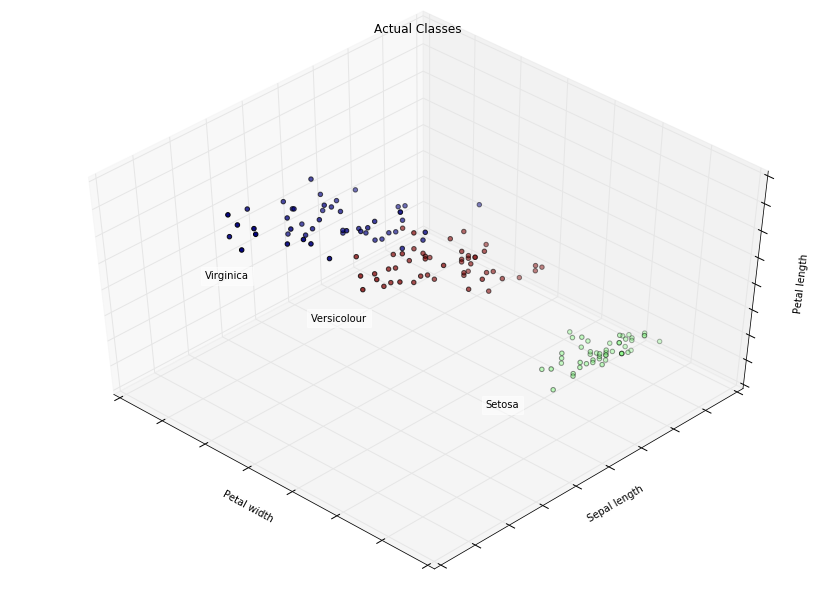

In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Define a set of k-means estimators.
estimators = {'k-Means (k=2)': KMeans(n_clusters=2),
              'k-Means (k=3)': KMeans(n_clusters=3),
              'k-Means (k=4)': KMeans(n_clusters=4),
              'k-Means (k=5)': KMeans(n_clusters=5)}

# Define a matplotlib figure.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

fignum = 1
for name, est in estimators.items():
    ax = plt.subplot(2, 2, fignum, projection='3d', elev=48, azim=134)

    # Fit the estimator.
    est.fit(X)
    labels = est.labels_

    # Define a scatterplot.
    ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2], c=labels.astype(np.float))

    # Customize the plot.
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title("\n" + name + "\n")
    fignum = fignum + 1

# Plot the ground truth.
fig = plt.figure(fignum, figsize=(12, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X.loc[y == label, 'Petal Width'].mean(),
              X.loc[y == label, 'Sepal Length'].mean() + 1.5,
              X.loc[y == label, 'Petal Length'].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results.
y_c = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X.iloc[:, 3], X.iloc[:, 0], X.iloc[:, 2], c=y_c)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.title("\nActual Classes\n")
plt.show()

We can see that when _k_ = 3, there is a high degree of correspondence between the clusters and the actual class values.

Now let's load the Digits dataset, a well-known dataset that is composed of handwritten digits between 0 and 9 stretched into a rectangular 16x16 box. Each instance in the dataset has 64 features, representing the individual pixels that comprise the image of a digit.

In [4]:
train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra'
test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes'

# Make the digits dataset.
df_train = pd.read_csv(train, header=None)
df_test = pd.read_csv(test, header=None)
df = pd.concat([df_train, df_test], axis=0)
df = df.rename(columns={64: 'Class'})

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.head())
print()
print(y.head())

   0   1   2   3   4   5   6   7   8   9  ...  54  55  56  57  58  59  60  61  \
0   0   1   6  15  12   1   0   0   0   7 ...   0   0   0   0   6  14   7   1   
1   0   0  10  16   6   0   0   0   0   7 ...   3   0   0   0  10  16  15   3   
2   0   0   8  15  16  13   0   0   0   1 ...   0   0   0   0   9  14   0   0   
3   0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   0   1  15   2   
4   0   0   5  14   4   0   0   0   0   0 ...  12   0   0   0   4  12  14   7   

   62  63  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 64 columns]

0    0
1    0
2    7
3    4
4    6
Name: Class, dtype: int64


To help visualize the digits data, we can use PCA to perform dimensionality reduction to reduce the digits dataset from 64 features (dimensions) to 2.

In [5]:
from sklearn.decomposition import PCA

# Perform PCA dimensionality reduction.
pca = PCA(n_components=2, svd_solver='randomized').fit(X)
X = pca.transform(X)

Now we can cluster the digits in these two dimensions. Again, we can use _k_-means clustering.

In [6]:
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist, pdist

# Cluster data into k=1..20 clusters.
k_max = 20
k_range = range(1, k_max+1)

k_means = [kmeans(X, k) for k in k_range]
centroids = [cent for (cent, var) in k_means]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
c_idx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]

# Cluster evaluation
tot_withinss = [sum(d**2) for d in dist]  # total within-cluster sum of squares
totss = sum(pdist(X)**2) / X.shape[0]       # total sum of squares
betweenss = totss - tot_withinss          # between-cluster sum of squares

We can sweep over a range of _k_ values (here, from 1 to 20) to identify the "elbow" point. The point where _k_ = 10 is denoted as the elbow point via a red circle in this plot. As there are ten digits in the dataset, the optimal value of *k*-means should ideally be ten.

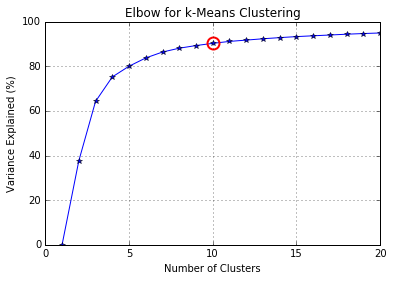

In [7]:
from matplotlib import cm

# Plots.
k_idx = 9 # k=10
clr = cm.spectral(np.linspace(0, 1, 10)).tolist()

# Elbow curve.
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(k_range, betweenss / totss * 100, 'b*-')
ax.plot(k_range[k_idx], betweenss[k_idx] / totss * 100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')

ax.set_ylim((0,100))
plt.grid(True)

plt.xlabel('Number of Clusters')
plt.ylabel('Variance Explained (%)')
plt.title('Elbow for k-Means Clustering')

With _k_ = 10 we can extract the particular points that represent the cluster centroids. As we are defining ten clusters, there are ten cluster centroids, one corresponding to each cluster.

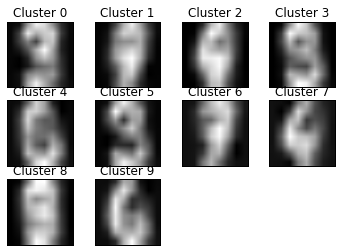

In [8]:
# Show centroids for k=10 clusters.
plt.figure()
for i in range(k_idx + 1):
    img = pca.inverse_transform(centroids[k_idx][i]).reshape(8, 8)
    ax = plt.subplot(3, 4, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap=cm.gray)
    plt.title('Cluster %d' % i)

Finally, we can compare the clusters produced by _k_-means with ten clusters to the actual classes of the digits.

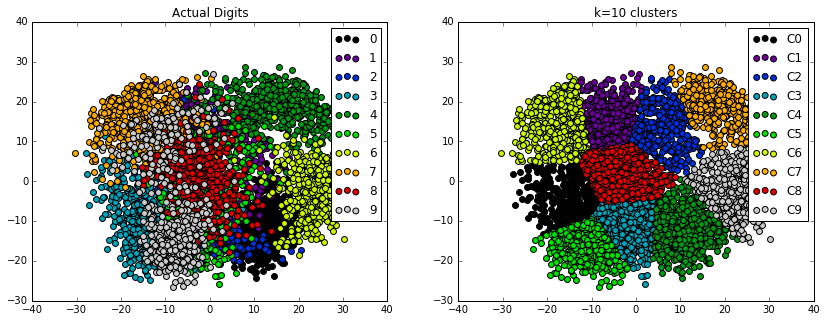

In [9]:
# Compare k=10 clustering vs. actual digits (PCA projections).
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121)

for i in range(10):
    ind = (y == i)

    ax.scatter(X[ind, 0], X[ind, 1], s=35, c=clr[i], label='%d'%i)
    plt.legend()

plt.title('Actual Digits')
ax = fig.add_subplot(122)

for i in range(k_idx+1):
    ind = (c_idx[k_idx]==i)
    ax.scatter(X[ind, 0], X[ind, 1], s=35, c=clr[i], label='C%d'%i)

plt.legend()
plt.title('k=%d clusters' % k_range[k_idx])

plt.show()

## Hierarchical Clustering

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. In agglomerative clustering, each instance starts in its own cluster, with pairs of clusters merged based upon their distance as one moves up the hierarchy. The linkage criterion determines the distance between sets of observations as a function of the pairwise distances between observations.

Here we illustrate the various linkage options for agglomerative clustering on a 2D embedding of the digits dataset. The goal of this example is to show intuitively how the metrics behave, and not to find good clusters for the digits. This is why the example works on a 2D embedding.

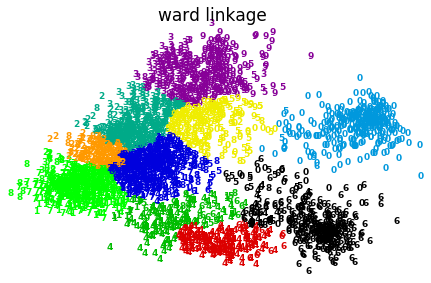

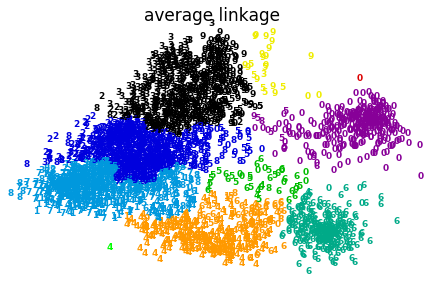

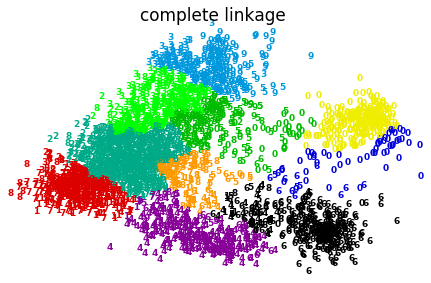

In [10]:
from scipy import ndimage
from sklearn import datasets, manifold
from sklearn.cluster import AgglomerativeClustering

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples.
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y

X, y = nudge_images(X, y)

# Visualize the clustering.
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

# 2D embedding of the digits dataset.
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    clustering.fit(X_red)
    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)

plt.show()

We can see that agglomerative clustering tends to create uneven cluster sizes. This behavior is especially pronounced for the average linkage strategy, that ends up with a couple of singleton clusters.